
## PROBLEM STATEMENT

The  primary goal of any company is to solve customer problems and fulfill their needs. Improving customer satisfaction through review of feedbacks is critical to the success of client business. The focus of this project is to analyze customer reviews and feedbacks of various Amazon Alexa products, and find opportunities for improvement in products and services. The objective is to discover insights and perform sentiment analysis on the data.
Dataset - Amazon Alexa Review
Data Source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews


### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')


In [4]:
# read tsv file into dataframe : df
df=pd.read_csv("amazon_alexa.tsv",sep="\t")


In [5]:
# display top 5 rows of dataframe 
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
# Dimensions of dataframe
df.shape

(3150, 5)

** The data frame has 3150 rows and 5 columns**

In [7]:
# Feature Names
print(df.columns)


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


** The data set has 5 columns **
- rating
- date
- variation
- verfied_reviews
- feedback

In [8]:
# Explore data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [9]:
# check for missing values - boolean output

df.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [10]:
# columns of dataframe
print(df.columns)


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [11]:
#frequency count on " rating " column
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [12]:
#frequency count on " feedback " column
df['feedback'].value_counts(dropna=False)

1    2893
0     257
Name: feedback, dtype: int64

In [13]:
#sns.heatmap((df.isnull()),yticklabels=False,cbar=False,cmap='viridis')


In [14]:
# number of missing values in each column of dataframe
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [15]:
# import plotly 
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.7.0


In [16]:
# import cufflinks
import cufflinks as cf

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
# For Notebooks
init_notebook_mode(connected=True)

In [18]:
# For offline use
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [19]:
#sns.countplot(x = 'rating', data = df_alexa)

In [20]:
#df.iplot(kind='bar',x='variation',y='rating',filename='cufflinks/categorical-bar-chart')

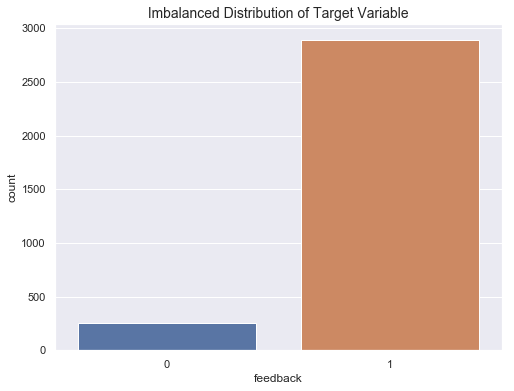

In [21]:
#Exploring Target Variable
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(df['feedback'], label = "Count") 
plt.title(" Imbalanced Distribution of Target Variable ", fontsize=14);

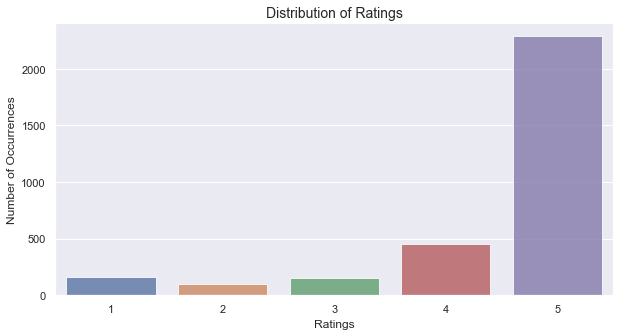

In [22]:
# Explore star ratings
r_count  = df['rating'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(r_count.index, r_count.values, alpha=0.8)
plt.title('Distribution of Ratings',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

In [23]:
#rating=df.groupby('rating')

In [24]:
#rating.sum()

In [25]:
#rating.feedback.sum()

In [26]:
#rating.feedback.count()

In [27]:
#feedback_zero_rt1=rating.get_group(1)

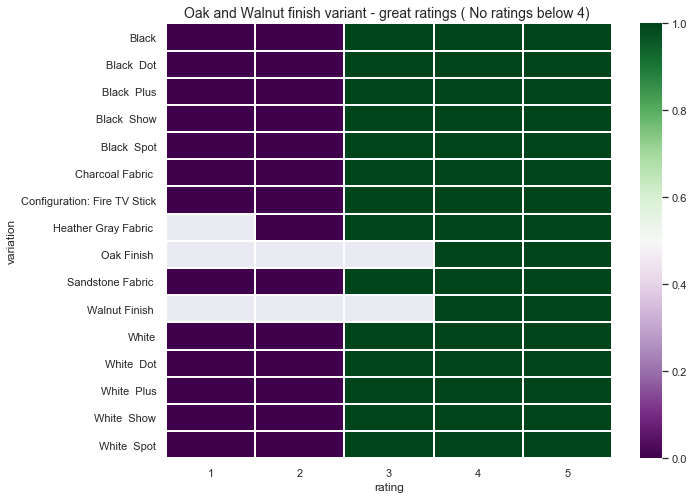

In [28]:
# Heatmap to explore variation vs ratings 
plt.figure(figsize=(10,8))
pvt_variation_rating=df.pivot_table(index='variation',columns='rating',values='feedback')
sns.heatmap(pvt_variation_rating,cmap='PRGn',linecolor='white',linewidth=1)
plt.title("Oak and Walnut finish variant - great ratings ( No ratings below 4) ",fontsize =14);

In [29]:
# frequency count by variations
feedback=df.groupby('feedback')

In [30]:
mask_0=df[df['feedback']==0]

In [31]:
mask_0=mask_0[['rating','variation']]

In [32]:
mask_0['variation'].value_counts().iplot(kind='bar',title="Number of Reviews by Variations")


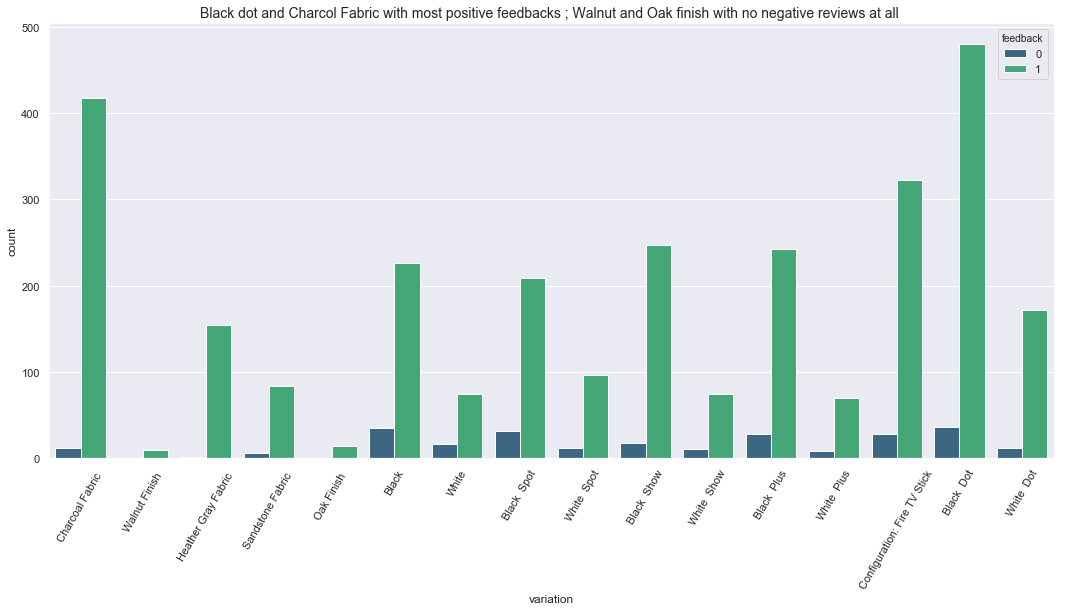

In [33]:
# explore ratio of positive negative feedbacks by variation
plt.figure(figsize=(18,8))
sns.countplot(x=df['variation'],hue='feedback',data=df,palette='viridis')
plt.xticks(rotation=60)
plt.title("Black dot and Charcol Fabric with most positive feedbacks ; Walnut and Oak finish with no negative reviews at all ",fontsize=14);

# EDA

In [34]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


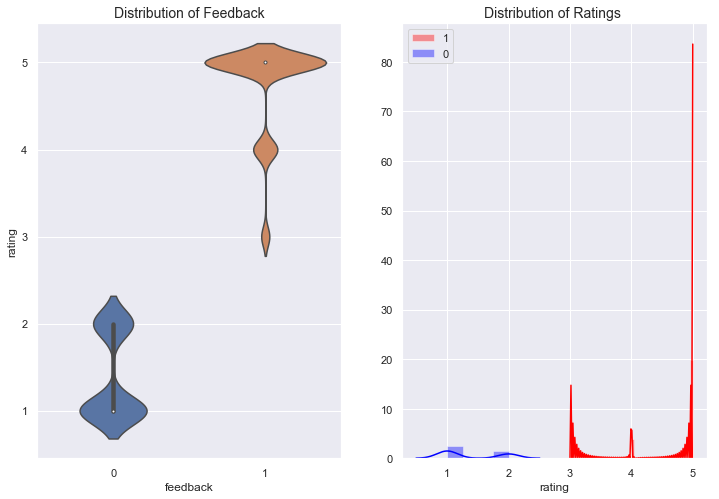

In [35]:
# Explore distribution of feedback with respect to ratings
# Violine plot
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'feedback', y = 'rating', data = df[0:])
plt.gca().set_title('Distribution of Feedback',fontsize=14)

# Explore distribution of ratings with respect to feedback

plt.subplot(1,2,2)
sns.distplot(df[df['feedback'] == 1.0]['rating'][0:] , label = "1", color = 'red')
sns.distplot(df[df['feedback'] == 0.0]['rating'][0:] , label = "0" , color = 'blue' )
plt.legend()
plt.title("Distribution of Ratings ",fontsize=14)
plt.show()

In [36]:
# probability density is high on ratings 5 for positive feedback (1)
# probability density is high on rating 1 for negative feedback (0 )
# trend in rating-> product mostly received rating 5 followed by 3.
# In negative reviews, ratings 1 is dominant followed by 2

In [37]:
# Exploring Reviews 
# Reviews are written in plain english and consists of short forms which we need to correct
# https://stackoverflow.com/a/47091490/4084039
import re
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [38]:
# Pre-processing text review : preprocessed_text
from tqdm import tqdm
preprocessed_essays = []
for sentance in tqdm(df['verified_reviews'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

df['preprocessed_text'] = preprocessed_essays

100%|███████████████████████████████████| 3150/3150 [00:00<00:00, 10436.50it/s]


### Review Length: Number of Words

One of the important features that can be extracted easily from the raw text data is the number of words in each review. 

In [39]:
# Get length of review
df['review_length'] = df.verified_reviews.apply(lambda x : len(str(x).split(" ")))
df.head()

,rating,date,variation,verified_reviews,feedback,preprocessed_text,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,39
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaurs control ...,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,1


### Average Word Length
We will also extract another feature which will calculate the average word length of each review. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the review:

In [40]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) != 0:
        return (sum(len(word) for word in words)/len(words))
    return 0

df['avg_word'] = df['verified_reviews'].apply(lambda x: avg_word(x))
df[['verified_reviews','avg_word']].head()

,verified_reviews,avg_word
0,Love my Echo!,3.666667
1,Loved it!,4.000000
2,"Sometimes while playing a game, you can answer...",4.131579
3,I have had a lot of fun with this thing. My 4 ...,4.088235
4,Music,5.000000


### Statistics on Review Length

In [41]:
# Check the mean, standard deviation, and maximum
print('The mean for the length of review:',df['review_length'].mean())
print('The standard deviation for the length of reviews:',df['review_length'].std())
print('The maximum for the length of reviews:',df['review_length'].max())

The mean for the length of review: 25.74825396825397
The standard deviation for the length of reviews: 35.10162791720425
The maximum for the length of reviews: 526


Text(0.5, 1.0, 'Distribution of review length')

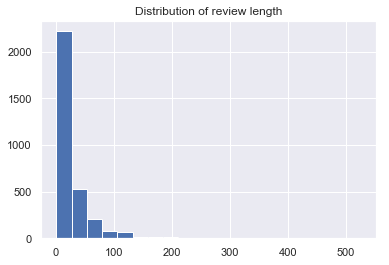

In [42]:
# Histogram - distribution of the length
df['review_length'].hist(bins=20)
plt.title('Distribution of review length')

### Which are the most frequent words in the reviews?

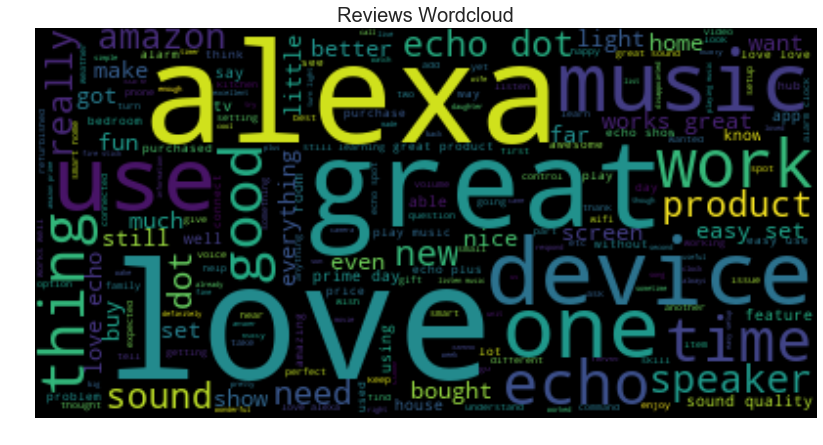

In [43]:

from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(14,10)})
reviews = ' '.join(df['preprocessed_text'].tolist())

wordcloud = WordCloud(background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews Wordcloud',size=20)
plt.show()

Text(0.5, 1.0, 'Counts of each variation')

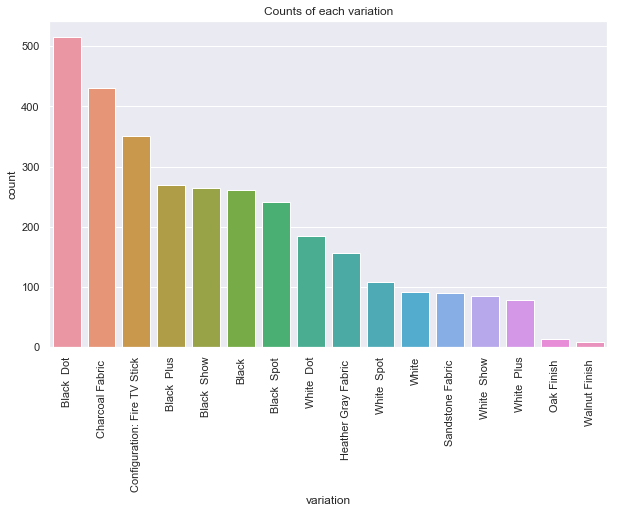

In [44]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(df.variation,
              order = df['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

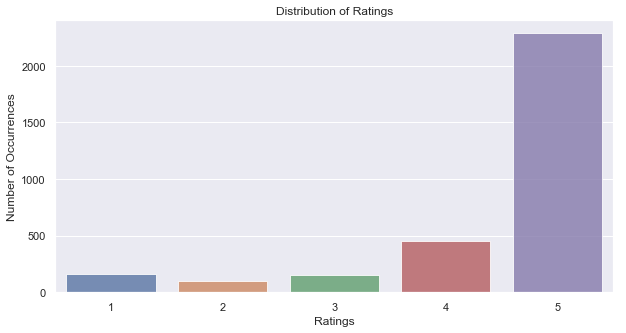

In [45]:
# Distribution of ratings

r_count  = df['rating'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(r_count.index, r_count.values, alpha=0.8)
plt.title('Distribution of Ratings')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

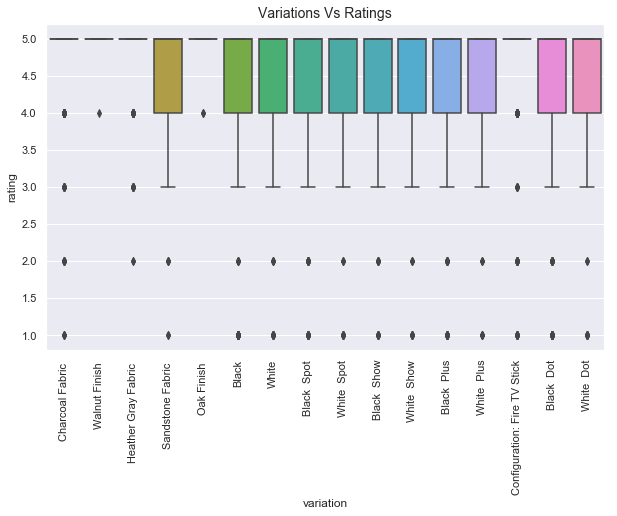

In [46]:
#variation vs ratings 
sns.boxplot(df.variation, df.rating)
plt.xticks(rotation = 90)
plt.title( "Variations Vs Ratings" , fontsize=14);

This is quite biased as most of the reviews are rating 5. Those rating 1 and 2 are considered outliers in each product variation.

In [47]:
#Most frequent words for reviews given with rating 5
freq = pd.Series(' '.join(df[df['rating']==5]['preprocessed_text']).split()).value_counts()[:10]
freq

love     848
great    570
echo     538
alexa    404
music    379
use      321
like     306
easy     293
works    280
one      245
dtype: int64

In [48]:
#Most frequent words for reviews given with feedback score of 1
f_freq_1 = pd.Series(' '.join(df[df['feedback']==1]['preprocessed_text']).split()).value_counts()[:10]
f_freq_1

love     949
echo     747
great    711
alexa    578
music    508
like     461
use      436
works    358
easy     341
sound    312
dtype: int64

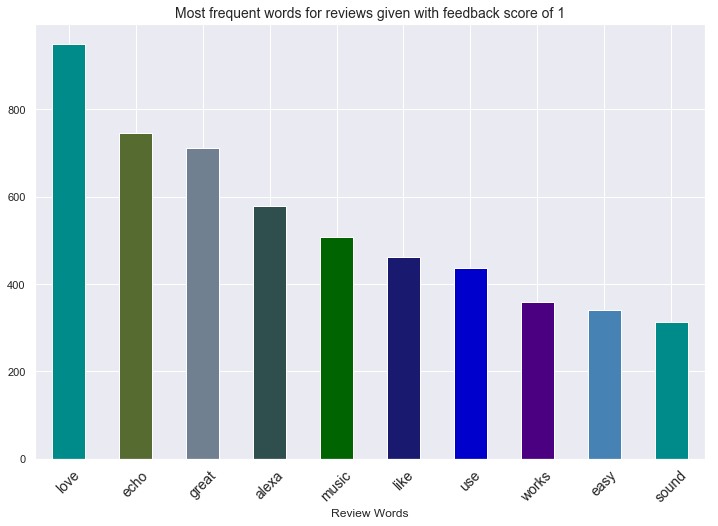

In [49]:
# plot : Most frequent words for positive feedback
plt.figure(figsize=(12,8))
colors=['darkcyan','darkolivegreen','slategray','darkslategrey','darkgreen','midnightblue','mediumblue','indigo','steelblue']
f_freq_1.plot(kind='bar',colormap='Paired',color=colors,rot=45)
plt.xlabel('Review Words', fontsize=12)
plt.title('Most frequent words for reviews given with feedback score of 1',fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [50]:
#Most frequent words for reviews given with feedback score of 0
f_freq_0 = pd.Series(' '.join(df[df['feedback']==0]['preprocessed_text']).split()).value_counts()[:10]
f_freq_0

echo       92
would      62
amazon     62
device     56
alexa      54
work       44
one        43
like       43
get        42
product    42
dtype: int64

In [51]:
#Least frequent words of reviews given with rating 5
lfreq = pd.Series(' '.join(df[df['rating']==5]['preprocessed_text']).split()).value_counts()[-10:]
lfreq

remaining      1
regard         1
prettier       1
opportunity    1
protection     1
resume         1
array          1
onetime        1
picky          1
example        1
dtype: int64

In [52]:
#Most frequent words for reviews given with feedback score 0 and rating of 1 
f_freq_0_1 = pd.Series(' '.join(df[(df['feedback']==0) & (df['rating']==1)]['preprocessed_text']).split()).value_counts()[:30]
f_freq_0_1

echo           50
amazon         45
would          34
one            30
dot            27
product        27
device         26
work           24
get            22
even           20
bought         19
alexa          19
time           19
working        18
screen         18
works          18
refurbished    17
thing          16
back           16
like           16
try            16
buy            14
could          14
phone          13
months         13
use            13
really         13
app            12
never          12
set            11
dtype: int64

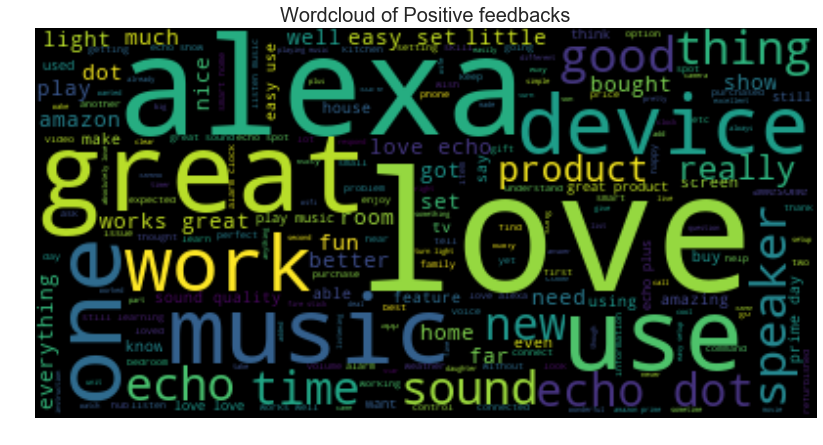

In [53]:
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(14,10)})
reviews = ' '.join(df[df['feedback']==1]['preprocessed_text'].tolist())

wordcloud = WordCloud(background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Wordcloud of Positive feedbacks',size=20)
plt.show()

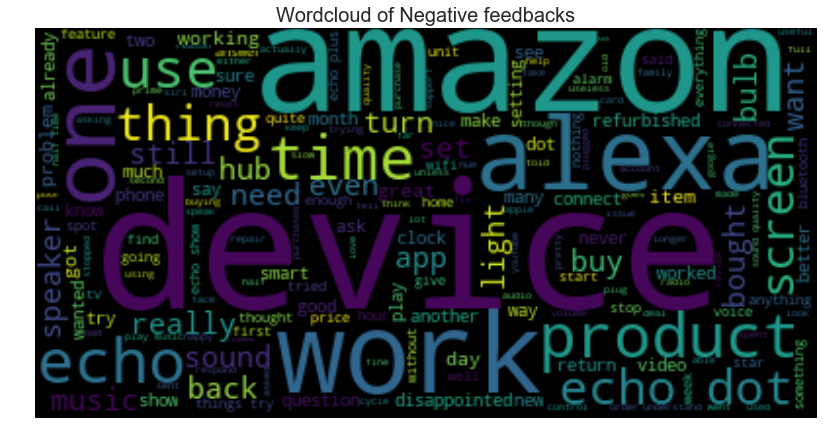

In [54]:
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(14,10)})
reviews = ' '.join(df[df['feedback']==0]['preprocessed_text'].tolist())

wordcloud = WordCloud(background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Wordcloud of Negative feedbacks',size=20)
plt.show()

In [55]:
df.head()

,rating,date,variation,verified_reviews,feedback,preprocessed_text,review_length,avg_word
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,3,3.666667
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,2,4.000000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,39,4.131579
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaurs control ...,34,4.088235
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,1,5.000000


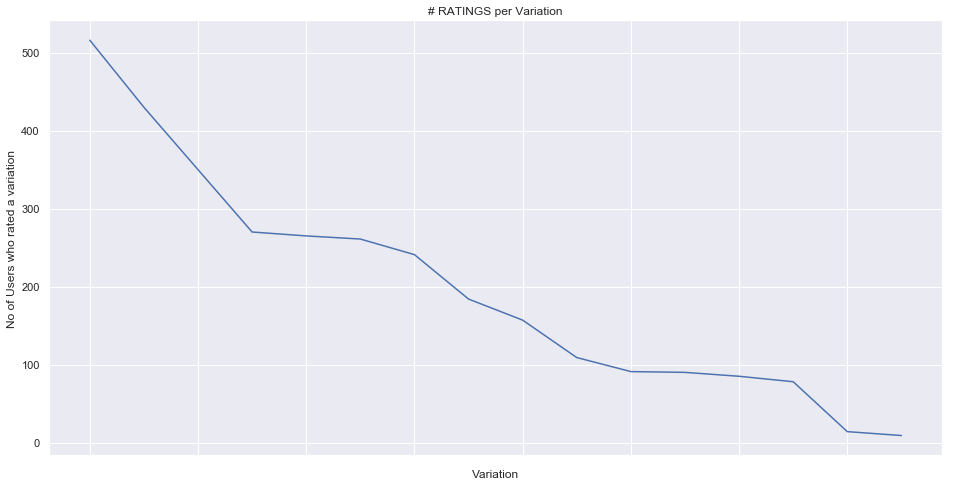

In [56]:
no_of_ratings_per_variation = df.groupby(by='variation')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_variation.values)
plt.title('# RATINGS per Variation')
plt.xlabel('Variation')
plt.ylabel('No of Users who rated a variation')
ax.set_xticklabels([])

plt.show()

There are some variations which are rated by huge number of users.

In [57]:
#import spacy 
import spacy 

In [58]:
npl=spacy.load("en_core_web_sm")

In [59]:
from spacy import displacy

In [60]:

feed_1 = ' '.join(df[df['feedback']==1]['preprocessed_text'].tolist())

In [61]:
# create document object: doc1 
doc1=npl(feed_1)

In [62]:
# find entity=Money in the document object
[ent for ent in doc1.ents if ent.label_=="MONEY"]

[every penny]

In [63]:
# list of pre-processed words for feedback score 0
feed_0 = ' '.join(df[df['feedback']==0]['preprocessed_text'].tolist())

In [64]:
#create document object : doc2
doc2=npl(feed_0)

In [65]:
#displacy.render(doc2,style='ent',jupyter=True)

In [66]:
# for sent in doc2.sents:
    #displacy.render(npl(sent.text),style='ent',jupyter=True)

In [67]:
# Highlight occurane of entities types -Product, date, time and cardianal in the doc2
colors = {"PRODUCT":"red","DATE":"green","TIME":"blue","CARDINAL":"purple"}
options={'ents':['PRODUCT','DATE','TIME','CARDINAL'],'colors':colors}

In [68]:
# use displacy for visulization of entities in the doc2 text
displacy.render(doc2,style='ent',jupyter=True,options=options)

In [69]:
# iterate through the doc2 object and find all entities 
for ent in doc2.ents:
    print(ent.text +"      " + ent.label_ +  "        " + str(spacy.explain(ent.label_)))

weeks      DATE        Absolute or relative dates or periods
today      DATE        Absolute or relative dates or periods
months      DATE        Absolute or relative dates or periods
one      CARDINAL        Numerals that do not fall under another type
one      CARDINAL        Numerals that do not fall under another type
one      CARDINAL        Numerals that do not fall under another type
two      CARDINAL        Numerals that do not fall under another type
ten feet      QUANTITY        Measurements, as of weight or distance
several days      DATE        Absolute or relative dates or periods
first      ORDINAL        "first", "second", etc.
one      CARDINAL        Numerals that do not fall under another type
one two weeks      DATE        Absolute or relative dates or periods
months      DATE        Absolute or relative dates or periods
months      DATE        Absolute or relative dates or periods
months      DATE        Absolute or relative dates or periods
one      CARDINAL       

In [70]:
df.head()

,rating,date,variation,verified_reviews,feedback,preprocessed_text,review_length,avg_word
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,3,3.666667
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,2,4.000000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,39,4.131579
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaurs control ...,34,4.088235
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,1,5.000000


In [71]:
# filter negative feedbacks
mask1=df['feedback']==0

In [72]:
# Mean review length for negative feedback
mean_review_length_0=df[mask1]['review_length'].mean()

In [73]:
# filter positive feedbacks
mask2=df['feedback']==1

In [74]:
# find mean view length on positive feedbacks
mean_review_length_1=df[mask2]['review_length'].mean()

In [75]:
mean_review_length=df.groupby('feedback')['review_length'].mean()

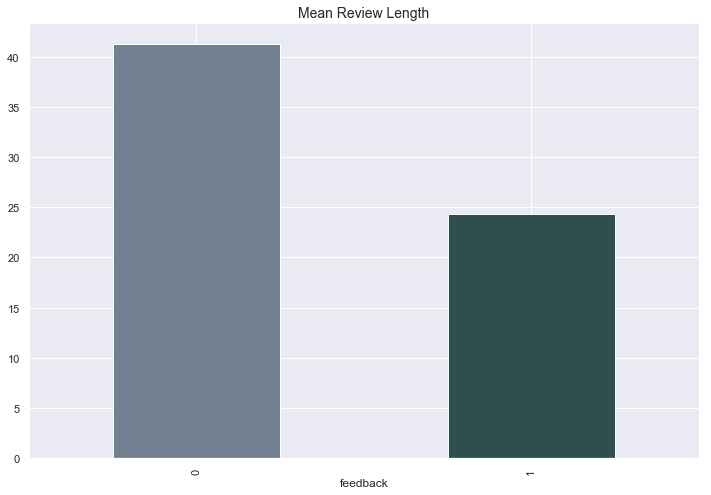

In [76]:
# mean review length for positive and negative feedback
plt.figure(figsize=(12,8))
colors=['slategray','darkslategrey']
p_1=mean_review_length.plot(kind='bar',colormap='Paired',colors=colors)
plt.title('Mean Review Length',fontsize=14)
plt.show()

In [77]:
import seaborn as sns

In [78]:
mean_word_length=df.groupby('feedback')['avg_word'].mean()

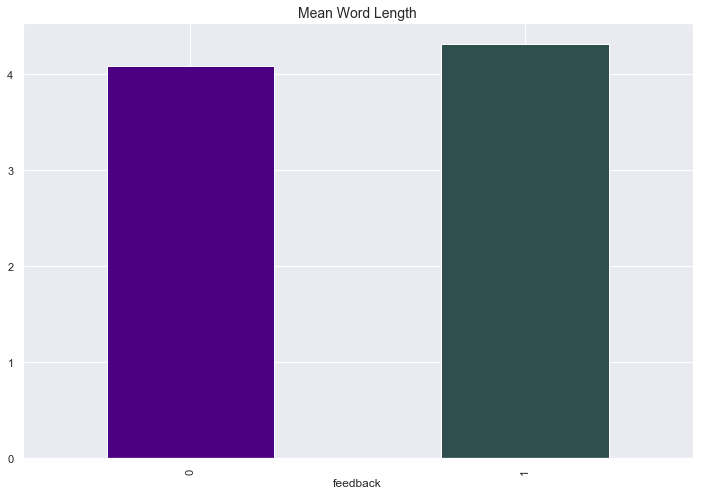

In [79]:
# mean word length for positive and negative feedback
plt.figure(figsize=(12,8))
colors=['indigo','darkslategrey']
p_1=mean_word_length.plot(kind='bar',colors=colors)
plt.title('Mean Word Length',fontsize=14)
plt.show()

## ML Prediction

In [80]:
df.head()

,rating,date,variation,verified_reviews,feedback,preprocessed_text,review_length,avg_word
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,3,3.666667
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,2,4.000000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,39,4.131579
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaurs control ...,34,4.088235
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,1,5.000000


In [81]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

### Preprocess the variation variable

In [82]:
preprocessed_var = []
for sentence in tqdm(df['variation'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_var.append(sent.lower().strip())

df['preprocessed_variations'] = preprocessed_var

100%|███████████████████████████████████| 3150/3150 [00:00<00:00, 24432.93it/s]


### Split data into train and test sets

In [83]:
X = df.drop(['date','variation','verified_reviews','feedback'], axis=1)
y = df['feedback']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.1)

Variation is a categorical variable. Let's encode this variable.

In [84]:
#Vectorizing Categorical data
vectorizer = CountVectorizer(binary=True, stop_words='english')
var_one_hot_train = vectorizer.fit_transform(X_train['preprocessed_variations'].values)
var_one_hot_cv = vectorizer.transform(X_cv['preprocessed_variations'].values)
var_one_hot_test = vectorizer.transform(X_test['preprocessed_variations'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig for training set: ",var_one_hot_train.shape)
print("Shape of matrix after one hot encodig for cv set: ",var_one_hot_cv.shape)
print("Shape of matrix after one hot encodig for test set: ",var_one_hot_test.shape)

['black', 'charcoal', 'configuration', 'dot', 'fabric', 'finish', 'gray', 'heather', 'oak', 'plus', 'sandstone', 'spot', 'stick', 'tv', 'walnut', 'white']
Shape of matrix after one hot encodig for training set:  (1890, 16)
Shape of matrix after one hot encodig for cv set:  (1134, 16)
Shape of matrix after one hot encodig for test set:  (126, 16)


In [85]:
features = []
features.extend(vectorizer.get_feature_names())

Vectorize the review text by using Tf-Idf Vectorizer. We will use unigram and bigram tokens from text data.

In [86]:
#vectorize review

vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), min_df=5, norm='l2', use_idf=True, stop_words='english')
text_vec_train = vectorizer.fit_transform(X_train['preprocessed_text'])
text_vec_cv = vectorizer.transform(X_cv['preprocessed_text'])
text_vec_test = vectorizer.transform(X_test['preprocessed_text'])
print("Shape of matrix after one hot encodig for training data: ",text_vec_train.shape)
print("Shape of matrix after one hot encodig for cv data: ",text_vec_cv.shape)
print("Shape of matrix after one hot encodig for test data: ",text_vec_test.shape)

Shape of matrix after one hot encodig for training data:  (1890, 962)
Shape of matrix after one hot encodig for cv data:  (1134, 962)
Shape of matrix after one hot encodig for test data:  (126, 962)


In [87]:
features.extend(vectorizer.get_feature_names())

In [88]:
#Standardize numerical values

rating_scalar = MinMaxScaler()
rating_scalar.fit(X_train['rating'].values.reshape(-1,1))

rating_mms_train = rating_scalar.transform(X_train['rating'].values.reshape(-1, 1))
rating_mms_test = rating_scalar.transform(X_test['rating'].values.reshape(-1, 1))

###################
review_len_scalar = MinMaxScaler()
review_len_scalar.fit(X_train['review_length'].values.reshape(-1,1))

review_len_mms_train = review_len_scalar.transform(X_train['review_length'].values.reshape(-1, 1))
review_len_mms_cv = review_len_scalar.transform(X_cv['review_length'].values.reshape(-1, 1))
review_len_mms_test = review_len_scalar.transform(X_test['review_length'].values.reshape(-1, 1))

###################
avg_word_scalar = MinMaxScaler()
avg_word_scalar.fit(X_train['avg_word'].values.reshape(-1,1))

avg_word_mms_train = avg_word_scalar.transform(X_train['avg_word'].values.reshape(-1, 1))
avg_word_mms_cv = avg_word_scalar.transform(X_cv['avg_word'].values.reshape(-1, 1))
avg_word_mms_test = avg_word_scalar.transform(X_test['avg_word'].values.reshape(-1, 1))

In [89]:
X_train_merged = hstack((var_one_hot_train, text_vec_train, review_len_mms_train, avg_word_mms_train)) #rating_mms_train

print(X_train_merged.shape)

X_cv_merged = hstack((var_one_hot_cv, text_vec_cv, review_len_mms_cv, avg_word_mms_cv))

print(X_cv_merged.shape)

X_test_merged = hstack((var_one_hot_test, text_vec_test, review_len_mms_test, avg_word_mms_test)) #rating_mms_test

print(X_test_merged.shape)

(1890, 980)
(1134, 980)
(126, 980)


In [90]:
features.append('review_len')
features.append('avg_word')

### Hyper Parameter Tuning###
The hyper paramter tuning is done on two variables - n_estimators and max_depth. The best hyper parameter is found which gives the maximum AUC value. Hyper paramters are tuned by CV set.

In [91]:
from sklearn.metrics import precision_score, roc_auc_score
estimators = [50, 100, 300, 200, 500]
max_depth = [5, 10, 50, 100, 200]
roc_tr = []
roc_cv = []
estimators_list = []
max_depth_list = []

for est in estimators:
    for depth in max_depth:
        estimators_list.append(est)
        max_depth_list.append(depth)
        clf = RandomForestClassifier(n_estimators=est, max_depth=depth, class_weight='balanced', n_jobs=-1)
        clf.fit(X_train_merged, y_train)
        roc_tr.append(roc_auc_score(y_train, clf.predict_proba(X_train_merged)[:,1]))
        roc_cv.append(roc_auc_score(y_cv, clf.predict_proba(X_cv_merged)[:,1]))
        #print('For est:{0}, depth:{1}, train prec:{2} and cv prec:{3}'.format(est, depth, prec_tr, prec_cv))

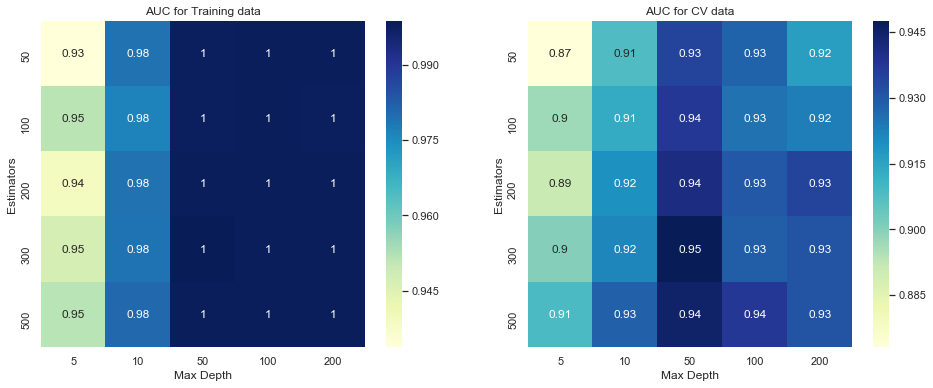

In [92]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':roc_tr})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':roc_cv})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for CV data')
plt.show()

In [93]:
clf = RandomForestClassifier(n_estimators=500, max_depth=50, class_weight='balanced', n_jobs=-1)
clf.fit(X_train_merged, y_train)
precision_score(y_test, clf.predict(X_test_merged))

0.928

In [94]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'CV AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

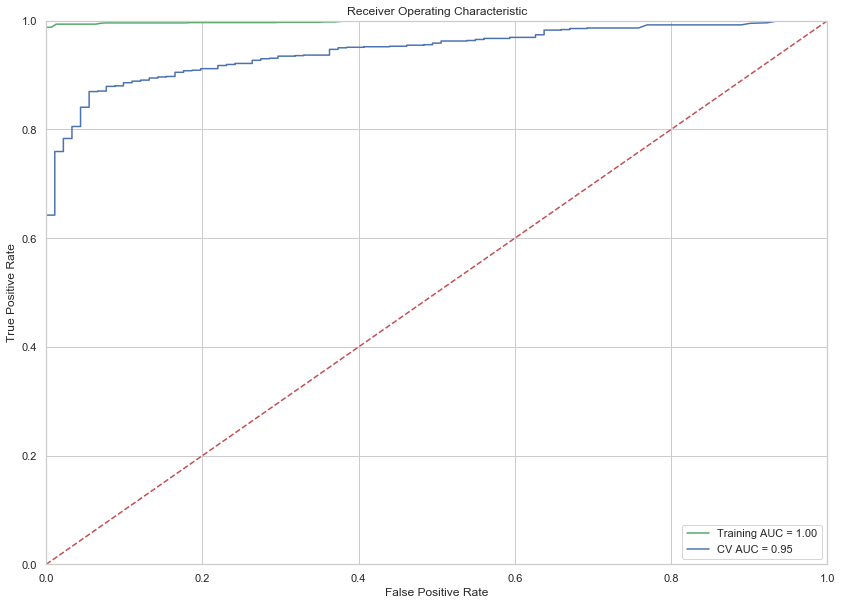

In [95]:
#Best hyper parameter 
clf = RandomForestClassifier(n_estimators=500, max_depth=50,
                             n_jobs=-1, class_weight='balanced')
clf.fit(X_train_merged, y_train)

y_pred_train = clf.predict_proba(X_train_merged)[:,1]
y_pred_cv = clf.predict_proba(X_cv_merged)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#cv data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_cv, y_pred_cv)
roc_auc_cv = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_cv)

In [96]:
'''estimators = [50, 100, 200, 500]
max_depth = [5, 10, 50, 100, 200]

#Hyper parameter tuning
grid_values = {'n_estimators': estimators, 'max_depth':max_depth, 'class_weight':['balanced']}
clf = GridSearchCV(RandomForestClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)
clf.fit(X_train_merged, y_train)
best_n_est_1 = clf.best_params_['n_estimators']
best_m_depth_1 = clf.best_params_['max_depth']
best_score_1 = clf.best_score_'''

"estimators = [50, 100, 200, 500]\nmax_depth = [5, 10, 50, 100, 200]\n\n#Hyper parameter tuning\ngrid_values = {'n_estimators': estimators, 'max_depth':max_depth, 'class_weight':['balanced']}\nclf = GridSearchCV(RandomForestClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)\nclf.fit(X_train_merged, y_train)\nbest_n_est_1 = clf.best_params_['n_estimators']\nbest_m_depth_1 = clf.best_params_['max_depth']\nbest_score_1 = clf.best_score_"

Plot the AUC values on Training and Test datasets with respect to given Hyper parameter values.

In [97]:
'''max_depth_list = list(clf.cv_results_['param_max_depth'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()'''

'max_depth_list = list(clf.cv_results_[\'param_max_depth\'].data)\nestimators_list = list(clf.cv_results_[\'param_n_estimators\'].data)\n\nsns.set_style("whitegrid")\nplt.figure(figsize=(16,6))\nplt.subplot(1,2,1)\ndata = pd.DataFrame(data={\'Estimators\':estimators_list, \'Max Depth\':max_depth_list, \'AUC\':clf.cv_results_[\'mean_train_score\']})\ndata = data.pivot(index=\'Estimators\', columns=\'Max Depth\', values=\'AUC\')\nsns.heatmap(data, annot=True, cmap="YlGnBu").set_title(\'AUC for Training data\')\nplt.subplot(1,2,2)\ndata = pd.DataFrame(data={\'Estimators\':estimators_list, \'Max Depth\':max_depth_list, \'AUC\':clf.cv_results_[\'mean_test_score\']})\ndata = data.pivot(index=\'Estimators\', columns=\'Max Depth\', values=\'AUC\')\nsns.heatmap(data, annot=True, cmap="YlGnBu").set_title(\'AUC for Test data\')\nplt.show()'

Develop Random Forest Classifier using best Hyper parameter values as found from Grid Search. ROC curve is plotted based on the predicted values obtained.

In [98]:
'''#Best hyper parameter 
clf = RandomForestClassifier(n_estimators=best_n_est_1, max_depth=best_m_depth_1,
                             n_jobs=-1, class_weight='balanced')
clf.fit(X_train_merged, y_train)

y_pred_train = clf.predict_proba(X_train_merged)[:,1]
y_pred_test = clf.predict_proba(X_test_merged)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)'''

"#Best hyper parameter \nclf = RandomForestClassifier(n_estimators=best_n_est_1, max_depth=best_m_depth_1,\n                             n_jobs=-1, class_weight='balanced')\nclf.fit(X_train_merged, y_train)\n\ny_pred_train = clf.predict_proba(X_train_merged)[:,1]\ny_pred_test = clf.predict_proba(X_test_merged)[:,1]\n\n   \n#train data ROC\nfpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)\nroc_auc_train = auc(fpr_tr, tpr_tr)\n\n#test data ROC\nfpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)\nroc_auc_test = auc(fpr_ts, tpr_ts)\n\n#Plot ROC curve\nplot_roc_curve(roc_auc_train, roc_auc_test)"

### Plot confusion matrix###

In [121]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=20
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d",annot_kws={"size":20})
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

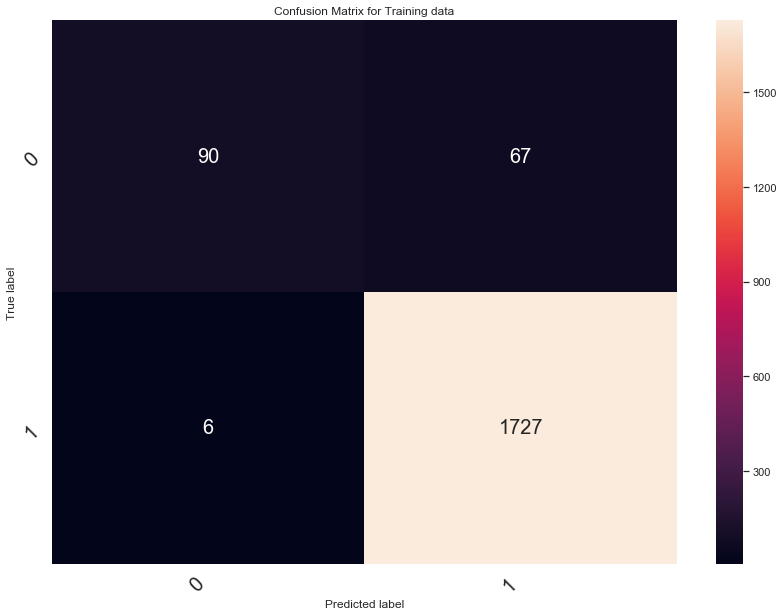

In [122]:
plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train_merged)), "Training data")

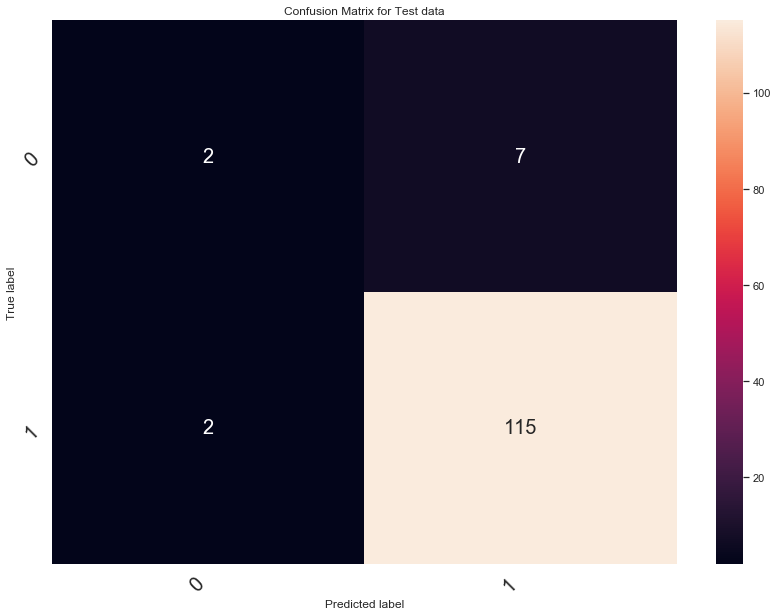

In [123]:
plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test_merged)), "Test data")

In [124]:
'''import operator
feat_dict = dict(zip(features, clf.feature_importances_))
sorted_x = sorted(feat_dict.items(), key=lambda kv: kv[1])
sorted_x.reverse()
sorted_x'''

'import operator\nfeat_dict = dict(zip(features, clf.feature_importances_))\nsorted_x = sorted(feat_dict.items(), key=lambda kv: kv[1])\nsorted_x.reverse()\nsorted_x'

In [125]:
estimators = [20, 50, 100, 200]
max_depth = [5, 10, 50, 100]
roc_tr = []
roc_cv = []
estimators_list = []
max_depth_list = []

for est in estimators:
    for depth in max_depth:
        estimators_list.append(est)
        max_depth_list.append(depth)
        clf = XGBClassifier(n_estimators=est, max_depth=depth, n_jobs=-1, learning_rate=0.1)
        clf.fit(X_train_merged, y_train)
        roc_tr.append(roc_auc_score(y_train, clf.predict_proba(X_train_merged)[:,1]))
        roc_cv.append(roc_auc_score(y_cv, clf.predict_proba(X_cv_merged)[:,1]))
        #print('For est:{0}, depth:{1}, train prec:{2} and cv prec:{3}'.format(est, depth, prec_tr, prec_cv))

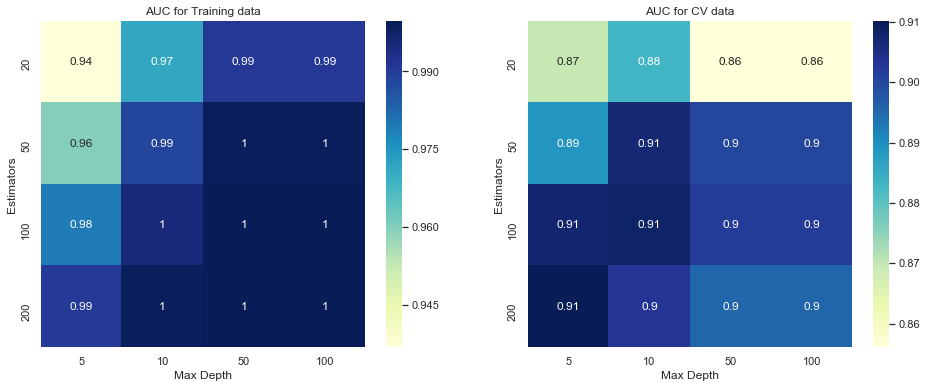

In [126]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':roc_tr})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':roc_cv})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for CV data')
plt.show()

In [127]:
clf = XGBClassifier(n_estimators=100, max_depth=10, n_jobs=-1, learning_rate=0.1)
clf.fit(X_train_merged, y_train)
precision_score(y_test, clf.predict(X_test_merged))

0.9354838709677419

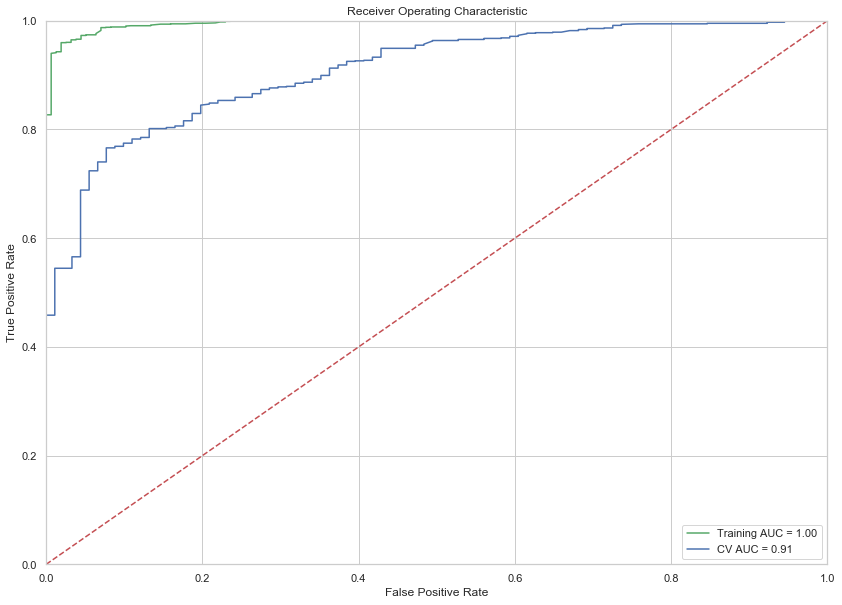

In [128]:
#Best hyper parameter 
clf = XGBClassifier(n_estimators=100, max_depth=10, n_jobs=-1, learning_rate=0.1)
clf.fit(X_train_merged, y_train)

y_pred_train = clf.predict_proba(X_train_merged)[:,1]
y_pred_cv = clf.predict_proba(X_cv_merged)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#cv data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_cv, y_pred_cv)
roc_auc_cv = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_cv)

In [129]:
'''estimators = [20, 50, 100, 200]
max_depth = [5, 10, 50, 100]

#Hyper parameter tuning
grid_values = {'n_estimators': estimators, 'max_depth':max_depth}
clf = GridSearchCV(XGBClassifier(n_jobs=-1, learning_rate=0.1), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)
clf.fit(X_train_merged, y_train)
best_n_est_2 = clf.best_params_['n_estimators']
best_m_depth_2 = clf.best_params_['max_depth']
best_score_2 = clf.best_score_'''

"estimators = [20, 50, 100, 200]\nmax_depth = [5, 10, 50, 100]\n\n#Hyper parameter tuning\ngrid_values = {'n_estimators': estimators, 'max_depth':max_depth}\nclf = GridSearchCV(XGBClassifier(n_jobs=-1, learning_rate=0.1), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)\nclf.fit(X_train_merged, y_train)\nbest_n_est_2 = clf.best_params_['n_estimators']\nbest_m_depth_2 = clf.best_params_['max_depth']\nbest_score_2 = clf.best_score_"

### Plot AUC values###

In [130]:
'''max_depth_list = list(clf.cv_results_['param_max_depth'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Max Depth':max_depth_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='Max Depth', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()'''

'max_depth_list = list(clf.cv_results_[\'param_max_depth\'].data)\nestimators_list = list(clf.cv_results_[\'param_n_estimators\'].data)\n\nsns.set_style("whitegrid")\nplt.figure(figsize=(16,6))\nplt.subplot(1,2,1)\ndata = pd.DataFrame(data={\'Estimators\':estimators_list, \'Max Depth\':max_depth_list, \'AUC\':clf.cv_results_[\'mean_train_score\']})\ndata = data.pivot(index=\'Estimators\', columns=\'Max Depth\', values=\'AUC\')\nsns.heatmap(data, annot=True, cmap="YlGnBu").set_title(\'AUC for Training data\')\nplt.subplot(1,2,2)\ndata = pd.DataFrame(data={\'Estimators\':estimators_list, \'Max Depth\':max_depth_list, \'AUC\':clf.cv_results_[\'mean_test_score\']})\ndata = data.pivot(index=\'Estimators\', columns=\'Max Depth\', values=\'AUC\')\nsns.heatmap(data, annot=True, cmap="YlGnBu").set_title(\'AUC for Test data\')\nplt.show()'

Develop XGB Classifier using best Hyper parameter values as found from Grid Search. ROC curve is plotted based on the predicted values obtained.

In [131]:
'''#Best hyper parameter 
clf = XGBClassifier(max_depth=best_m_depth_2, n_jobs=-1, learning_rate=0.1, n_estimators=best_n_est_2)

clf.fit(X_train_merged, y_train)

y_pred_train = clf.predict_proba(X_train_merged)[:,1]
y_pred_test = clf.predict_proba(X_test_merged)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)'''

'#Best hyper parameter \nclf = XGBClassifier(max_depth=best_m_depth_2, n_jobs=-1, learning_rate=0.1, n_estimators=best_n_est_2)\n\nclf.fit(X_train_merged, y_train)\n\ny_pred_train = clf.predict_proba(X_train_merged)[:,1]\ny_pred_test = clf.predict_proba(X_test_merged)[:,1]\n\n   \n#train data ROC\nfpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)\nroc_auc_train = auc(fpr_tr, tpr_tr)\n\n#test data ROC\nfpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)\nroc_auc_test = auc(fpr_ts, tpr_ts)\n\n#Plot ROC curve\nplot_roc_curve(roc_auc_train, roc_auc_test)'

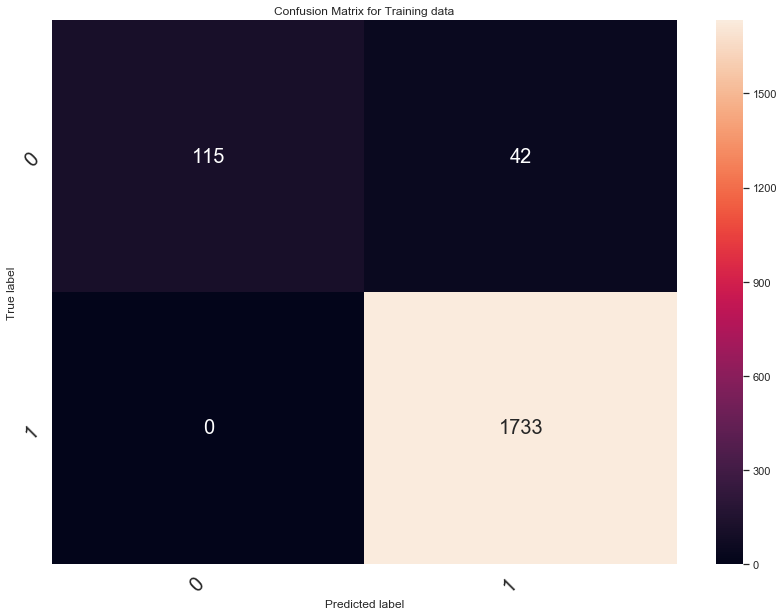

In [132]:
plot_conf_matrix(confusion_matrix(y_train, clf.predict(X_train_merged)), "Training data")

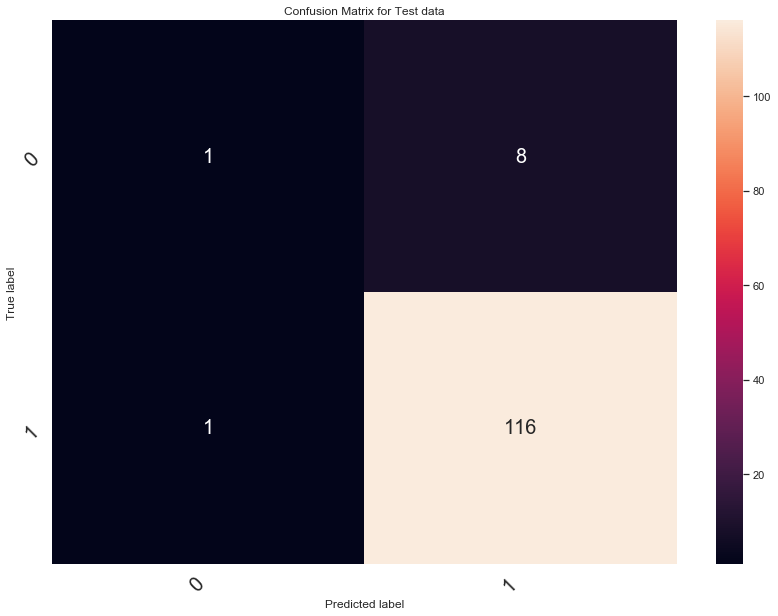

In [133]:
plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test_merged)), "Test data")

Test Accuracy

In [134]:
accuracy_score(y_test, clf.predict(X_test_merged))

0.9285714285714286

### Applying Naive Bayes to find best features for positive and negative classes###

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]

grid_values = {'alpha': alphas}
clf = GridSearchCV(MultinomialNB(), grid_values, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train_merged, y_train)
best_alpha = clf.best_params_['alpha']

In [136]:
clf = MultinomialNB(alpha = best_alpha)
clf.fit(X_train_merged, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [137]:
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

### Top 10 important features of positive class###

In [116]:
np.argsort(clf.feature_log_prob_[1,:])[:-(10 + 1):-1]

array([  0, 979,   4,   3,  15,   1,   2,  13,  12,  11], dtype=int64)

In [117]:
[features[i] for i in np.argsort(clf.feature_log_prob_[1,:])[:-(10 + 1):-1]]

['black',
 'avg_word',
 'fabric',
 'dot',
 'white',
 'charcoal',
 'configuration',
 'tv',
 'stick',
 'spot']

### Top 10 important features of negative class ###

In [118]:
np.argsort(clf.feature_log_prob_[0,:])[:-(10 + 1):-1]

array([  0, 979,  15,   3,  11,   9,  12,   2,  13,   4], dtype=int64)

In [119]:
[features[i] for i in np.argsort(clf.feature_log_prob_[0,:])[:-(10 + 1):-1]]

['black',
 'avg_word',
 'white',
 'dot',
 'spot',
 'plus',
 'stick',
 'configuration',
 'tv',
 'fabric']

### Conclusion ###
Compare the models

In [138]:
# compare the models   
x = PrettyTable()

x.field_names = [ "Model", "n_estimators", "Max Depth","AUC"]

x.add_row(["Random Forest", 500, 50, "0.95"])
x.add_row([ "XGB Classifier", 100, 10, "0.91"])
print(x)

+----------------+--------------+-----------+------+
|     Model      | n_estimators | Max Depth | AUC  |
+----------------+--------------+-----------+------+
| Random Forest  |     500      |     50    | 0.95 |
| XGB Classifier |     100      |     10    | 0.91 |
+----------------+--------------+-----------+------+
